<a href="https://colab.research.google.com/github/12Nepo/regresion_lineal/blob/main/ACT_6_1_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
df= pd.read_csv("DFL.csv")
df

<ipython-input-185-c19714112582>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("DFL.csv")


,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,0.0,2056638,20230329041210,10531228,3,7,19.35353,-99.16299,3,1,...,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...","1,434",t,2023-03-30,2014-01-03,2018-06-24,f
1,1.0,2072354,20230329041210,16840050,3,3,19.35358,-99.16948,2,1,...,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",830,t,2023-03-30,2014-01-01,2022-11-04,f
2,2.0,696037,20230329041210,3531879,4,4,19.4418,-99.18402,6,3,...,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...","1,469",t,2023-03-29,2012-10-31,2022-12-21,f
3,3.0,35797,20230329041210,153786,1,1,19.38283,-99.2,2,1,...,Entire villa,Entire home/apt,1 bath,"[""Wifi"", ""Washer"", ""BBQ grill"", ""Indoor firepl...","3,658",t,2023-03-29,sin informacion,sin informacion,f
4,4.0,44616,20230329041210,196253,16,16,19.41162,-99.17794,2.9,1,...,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...","18,000",t,2023-03-30,2011-11-09,2023-03-26,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22007,22006.0,803701530756714240.0,20230329041210,322510577,5,5.9,19.405628,-99.164799,2.0,1,...,Private room in rental unit,Private room,1 private bath,"[""Wifi"", ""Pets allowed"", ""Lockbox"", ""TV"", ""Fir...",283,t,2023-03-29,2023-01-22,2023-02-17,t
22008,22007.0,803741611995338496.0,20230329041210,195253877,6,6.0,19.411629,-99.161556,2.0,1,...,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Free street parking"", ""Luggag...",804,t,2023-03-30,2023-01-19,2023-01-29,t
22009,22008.0,803758966788215680.0,20230329041210,492089560,3,3.0,19.405603,-99.155712,2.0,3,...,Private room in rental unit,Private room,1 shared bath,"[""Cleaning products"", ""Dedicated workspace"", ""...",454,t,2023-03-30,sin informacion,sin informacion,f
22010,22009.0,802784776175944704.0,20230329041210,27411678,18,20.0,19.425984,-99.167117,2.0,1,...,Entire rental unit,Entire home/apt,1 bath,"[""Wifi"", ""Cleaning available during stay"", ""Lu...","1,200",t,2023-03-30,2023-01-20,2023-03-20,t


In [186]:
DFF = df[df["room_type"].isin(["Private room", "Hotel room"])]

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

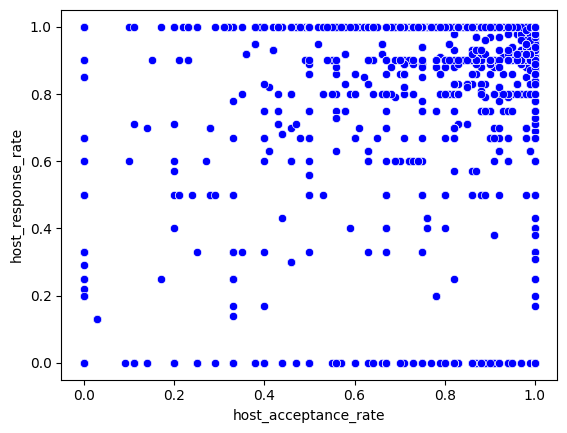

In [187]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="blue", data=DFF)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [188]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= DFF[['host_acceptance_rate']]
Var_Dep= DFF['host_response_rate']

In [189]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [190]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [191]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [192]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.69864]),
 'rank_': 1,
 'singular_': array([31.96200501]),
 'intercept_': 0.19888781294018631}

Modelo matematico: y=0.69864 + 0.19888781294018631

In [193]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.38232977080115205

In [194]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.6183282063768012

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

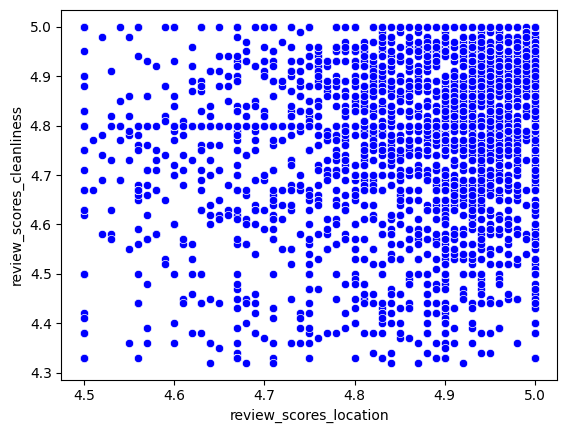

In [195]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color="blue", data=DFF)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [196]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= DFF[['review_scores_location']]
Var_Dep= DFF['review_scores_cleanliness']

In [197]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [198]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [199]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [200]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_location'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.56399359]),
 'rank_': 1,
 'singular_': array([10.12645237]),
 'intercept_': 2.0507338139314717}

Modelo matematico: y= 0.56399359 + 2.0507338139314717

In [201]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.16435791815700684

In [202]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.6183282063768012

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

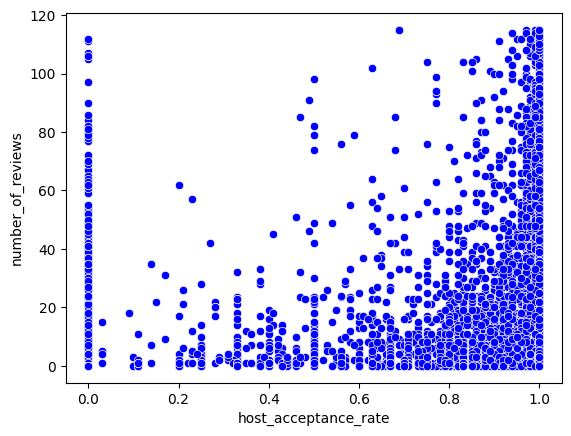

In [203]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color


sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="blue", data=DFF)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [204]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= DFF[['host_acceptance_rate']]
Var_Dep= DFF['number_of_reviews']

In [205]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [206]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [207]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [208]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([15.90760663]),
 'rank_': 1,
 'singular_': array([31.96200501]),
 'intercept_': 5.146548192136969}

Modelo matematico: y= 15.90760663 + 5.146548192136969

In [209]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.05997686538971436

In [210]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.6183282063768012

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

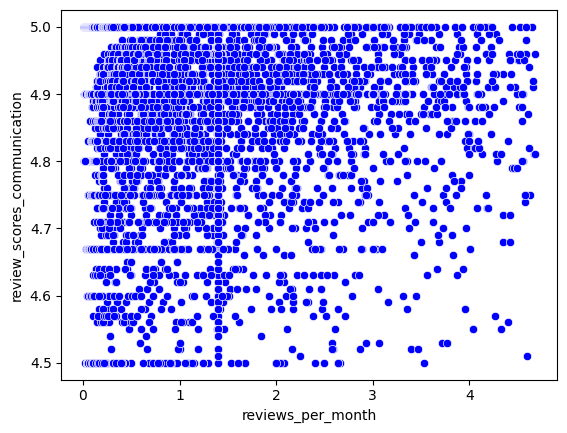

In [211]:
#Imprimimos el scatter plot entre la variable dependiente (total) e independiente (alchool) 
#para observar el comportamiento en su dispersión 
from turtle import color
sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color="blue", data=DFF)
#sns.scatterplot(X='speeding', y='total', color="red", data=df)

In [212]:
#Declaramos las variables dependientes e independientes para la regresión lineal
#Vars_Indep= df[['alcohol', 'speeding']]
Vars_Indep= DFF[['reviews_per_month']]
Var_Dep= DFF['review_scores_communication']

In [213]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [214]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [215]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [216]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.03406291]),
 'rank_': 1,
 'singular_': array([82.30907466]),
 'intercept_': 4.921128586557305}

Modelo matematico: y= -0.03406291 + 4.921128586557305

In [217]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.0752251151686103

In [218]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

0.6183282063768012